In [1]:

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

import scipy.stats as stats

In [2]:

# read data from Github
df = pd.read_csv("https://raw.githubusercontent.com/JinmingChen12/AIM-5001/master/Cal%20Fire/California_Fire_Incidents_with_income.csv")

# To display the top 5 rows
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,median_income,median_income_level
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,56493.0,2
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,64251.0,3
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,63948.0,3
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,84357.0,4
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,84017.0,4


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AcresBurned,1633.0,4589.443968,27266.337722,0.00000,35.000000,100.000000,422.000000,410203.0000
AirTankers,28.0,4.071429,6.399818,0.00000,2.000000,2.000000,4.000000,27.0000
ArchiveYear,1636.0,2016.608802,1.845340,2013.00000,2015.000000,2017.000000,2018.000000,2019.0000
CrewsInvolved,171.0,11.561404,14.455633,0.00000,2.500000,6.000000,13.500000,82.0000
Dozers,123.0,7.585366,14.028616,0.00000,1.000000,2.000000,5.000000,76.0000
Engines,191.0,23.565445,41.004424,0.00000,5.000000,11.000000,24.000000,256.0000
Fatalities,21.0,8.619048,18.529642,1.00000,1.000000,3.000000,6.000000,85.0000
Helicopters,84.0,5.357143,7.265437,0.00000,1.000000,2.000000,5.000000,29.0000
Injuries,120.0,3.500000,3.806231,0.00000,1.000000,3.000000,4.000000,26.0000
Latitude,1636.0,37.203975,135.401380,-120.25800,34.165890,37.104065,39.086808,5487.0000


## EDA

In [4]:
# !pip install pandas-profiling

In [5]:
import pandas_profiling

In [6]:
# pandas_profiling.ProfileReport(df)

# Q1: The relationship of  StructuresDestroyed and  the injures 

In [27]:
fire = pd.DataFrame(df)
fire.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,median_income,median_income_level
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,56493.0,2
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,64251.0,3
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,63948.0,3
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,84357.0,4
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,84017.0,4


Text(0.5, 1.0, 'Relationship between StructuresDestroyed and Injuries')

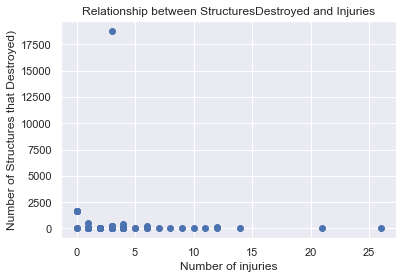

In [8]:
plt.scatter(fire.Injuries, fire.StructuresDestroyed)
plt.ylabel("Number of Structures that Destroyed)")
plt.xlabel("Number of injuries")
plt.title("Relationship between StructuresDestroyed and Injuries")

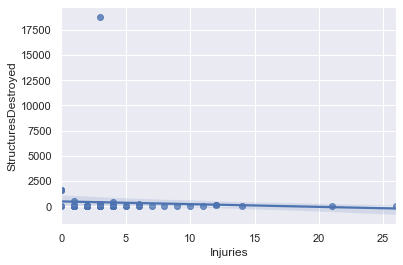

In [9]:
sns.regplot(y="StructuresDestroyed", x="Injuries", data=fire, fit_reg = True)



##  Linear Regression with Cal Wildfire Data Example

***

Here, 

$Y$ = Structures that destroyed 

and

$X$ = number of injuries

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

In [10]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('StructuresDestroyed ~ Injuries',fire).fit()
print(m.summary())

                             OLS Regression Results                            
Dep. Variable:     StructuresDestroyed   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                 -0.010
Method:                  Least Squares   F-statistic:                    0.2235
Date:                 Tue, 04 May 2021   Prob (F-statistic):              0.638
Time:                         22:21:32   Log-Likelihood:                -691.19
No. Observations:                   76   AIC:                             1386.
Df Residuals:                       74   BIC:                             1391.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    481.8583    331.063      1.45

Interpreting coefficients
There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the RM coefficient (9.1021) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the number of rooms, RM, is a statisticall significant predictor of PRICE. The regression coefficient for RM of 9.1021 means that on average, each additional room is associated with an increase of  $9,100  in house price net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ( $8,279,$9,925 ), definitely not chump change.

In general, the  𝛽𝑖^,𝑖>0  can be interpreted as the following: "A one unit increase in  𝑥𝑖  is associated with, on average, a  𝛽𝑖^  increase/decrease in  𝑦  net of all other variables."

On the other hand, the interpretation for the intercept,  𝛽̂ 0  is the average of  𝑦  given that all of the independent variables  𝑥𝑖  are 0.

In [12]:
from sklearn.linear_model import LinearRegression
X = fire.drop('StructuresDestroyed', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [13]:
# your turn
mw = ols('StructuresDestroyed ~ Injuries -1',fire).fit()
print(mw.summary())

                                 OLS Regression Results                                 
Dep. Variable:     StructuresDestroyed   R-squared (uncentered):                   0.005
Model:                             OLS   Adj. R-squared (uncentered):             -0.008
Method:                  Least Squares   F-statistic:                             0.3943
Date:                 Tue, 04 May 2021   Prob (F-statistic):                       0.532
Time:                         22:21:32   Log-Likelihood:                         -692.26
No. Observations:                   76   AIC:                                      1387.
Df Residuals:                       75   BIC:                                      1389.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Conclusion: 

Because the p-value is much bigger than 0.05, there is no relationship  between StructuresDestroyed and  the injures.  

# Q2: Does High income area, upper middle income, lower middle income, and low-income area in Cal has same chance to have wild fire? 

## Set up the hypothesis

α = 0.05

Null Hypothesis： H0: μ1 = μ2 = μ3 = μ4  = 25%, each income level will have same probability to have wildfire.      
Alternative Hypothesis: H1: at least one of the income level will not have 25% chance to have a wildfire. 




## Calculating the observed value

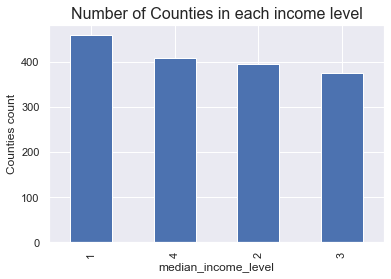

<Figure size 1008x432 with 0 Axes>

In [50]:
nameplot=fire["median_income_level"].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel("median_income_level") 
plt.ylabel("Counties count") 
plt.title("Number of Counties in each income level", fontsize=16) 
plt.figure(figsize=(14,6)) 
nameplot

In [16]:
counts = fire["median_income_level"].value_counts()
counts

1    459
4    409
2    394
3    374
Name: median_income_level, dtype: int64

## Calculating the Chi-square and the p-value

In [32]:

observed = np.array([459, 394, 374, 409])
expected = np.array([0.25, 0.25, 0.25, 0.25]) * np.sum(observed)

(t, p) = stats.chisquare(observed, expected)
print('Test t=%f, p-value = %f' % (t, p))

alpha = 0.05  # significance level

if p <= alpha:
    # we reject null hypothesis
    print ('Null hypothesis can be rejected')
else:
    # we reject alternative hypothesis
    print ('Null hypothesis cannot be rejected')

Test t=9.657702, p-value = 0.021712
Null hypothesis can be rejected


## Conclusion: 

The p-value is 0.02 which is smaller than 0.05. Therefore, there are enough evidence to reject the null, which there is at least one of the income level will not have 25% chance to have the wildfire. 

Reference: 
1. https://gist.github.com/panicpotatoe/15b83baff193e2f2ffdf100ffcd9db0f
2. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
3. https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html
4. https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d